In [2]:
pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 30.7 MB/s eta 0:00:00


In [ ]:
from Bio import SeqIO
record= SeqIO.read('/content/maob.gb', 'genbank')
print('ID', record.id)
print('Name:',record.name)
print('Description:', record.description)
print('sequence Lenght:',len(record.seq))

ID NM_000898.5
Name: NM_000898
Description: Homo sapiens monoamine oxidase B (MAOB), mRNA
sequence Lenght: 2570


In [ ]:
#   Extract Feauters
print("Number of features:", len(record.features))

for feature in record.features:
    print(feature.type)


Number of features: 27
source
gene
exon
misc_feature
CDS
misc_feature
misc_feature
misc_feature
misc_feature
misc_feature
misc_feature
exon
exon
exon
exon
exon
exon
exon
exon
exon
exon
exon
exon
exon
exon
regulatory
polyA_site


In [ ]:
for feature in record.features:
    if feature.type == "CDS":
        cds_seq = feature.extract(record.seq)


        print("CDS length:", len(cds_seq))
print("Divisible by 3:", len(cds_seq) % 3 == 0)
print("First 60 bases:", cds_seq[:60])
print("Last 60 bases:", cds_seq[-60:])

CDS length: 1563
Divisible by 3: True
First 60 bases: ATGAGCAACAAATGCGACGTGGTCGTGGTGGGGGGCGGCATCTCAGGTATGGCAGCAGCC
Last 60 bases: TTTTCAGCAACGGCTCTTGGCTTCCTGGCCCACAAAAGGGGGCTACTTGTGAGAGTCTAA


In [ ]:
# Translate cds
protein_seq = cds_seq.translate(to_stop=True)

print('Protein Sequence Length:', len(protein_seq))
print('first 60 amino acids:', protein_seq[:60])
print('Last 60 amino acids:', protein_seq[-60:])


Protein Sequence Length: 520
first 60 amino acids: MSNKCDVVVVGGGISGMAAAKLLHDSGLNVVVLEARDRVGGRTYTLRNQKVKYVDLGGSY
Last 60 amino acids: EIWQSEPESVDVPAQPITTTFLERHLPSVPGLLRLIGLTTIFSATALGFLAHKRGLLVRV


In [ ]:
# save as fasta
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
from Bio import SeqIO

protein_record = SeqRecord(
    Seq(str(protein_seq)),
    id="MAOB_HUMAN",
    description="Monoamine oxidase B protein (translated from GenBank CDS)"
)

SeqIO.write(protein_record, "MAOB_protein.fasta", "fasta")

print("Protein FASTA file saved as MAOB_protein.fasta")


Protein FASTA file saved as MAOB_protein.fasta


In [4]:
# MSA
from Bio import SeqIO

for record in SeqIO.parse("/content/maob_blast_homolog.fasta.txt", "fasta"):
    print(record.id, len(record.seq))


NP_000889.3 520
XP_003317481.2 520
NP_001124895.1 520
XP_032612650.1 520
XP_007989645.1 520
XP_003271069.1 520
XP_010351148.1 520
XP_026369120.2 520


In [5]:
# Install Clustal Omega
!apt-get install -y clustalo


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libargtable2-0
The following NEW packages will be installed:
  clustalo libargtable2-0
0 upgraded, 2 newly installed, 0 to remove and 1 not upgraded.
Need to get 273 kB of archives.
After this operation, 694 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libargtable2-0 amd64 13-1.1 [14.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 clustalo amd64 1.2.4-7 [259 kB]
Fetched 273 kB in 1s (374 kB/s)
Selecting previously unselected package libargtable2-0.
(Reading database ... 117528 files and directories currently installed.)
Preparing to unpack .../libargtable2-0_13-1.1_amd64.deb ...
Unpacking libargtable2-0 (13-1.1) ...
Selecting previously unselected package clustalo.
Preparing to unpack .../clustalo_1.2.4-7_amd64.deb ...
Unpacking clustalo (1.2.4-7) ...
Setting up 

In [6]:
# aligenment
!clustalo \
-i /content/maob_blast_homolog.fasta.txt \
-o mao_aligned.fasta \
--outfmt fasta \
--force


In [7]:
# Confirm alignment worked
from Bio import AlignIO

alignment = AlignIO.read("/content/mao_aligned.fasta", "fasta")
print("Number of sequences:", len(alignment))
print("Alignment length:", alignment.get_alignment_length())


Number of sequences: 8
Alignment length: 520


In [8]:
from Bio import AlignIO

alignment = AlignIO.read("/content/mao_aligned.fasta", "fasta")

for record in alignment:
    print(record.id)
    print(record.seq[:80])
    print()


NP_000889.3
MSNKCDVVVVGGGISGMAAAKLLHDSGLNVVVLEARDRVGGRTYTLRNQKVKYVDLGGSYVGPTQNRILRLAKELGLETY

XP_003317481.2
MSNKCDVVVVGGGISGMAAAKLLHDSGLNVVVLEARDRVGGRTYTLRNQKVKYVDLGGSYVGPTQNRILRLAKELGLETY

NP_001124895.1
MSNKCDVVVVGGGISGMAAAKLLHDSGLNVVVLEARDRVGGRTYTLRNQKVKYVDLGGSYVGPTQNRILRLAKELGLETY

XP_032612650.1
MSNKCDVVVVGGGISGMAAAKLLHDSGLNVVVLEARDRVGGRTYTLRNQKVKYVDLGGSYVGPTQNRILRLAKELGLETY

XP_007989645.1
MSNKCDVVVVGGGISGMAAAKLLHDSGLNVVVLEARDRVGGRTYTLRNQKVKYVDLGGSYVGPTQNRILRLAKELGLETY

XP_003271069.1
MSNKCDVVVVGGGISGMAAAKLLHDSGLNVVVLEARDRVGGRTYTLRNQKVKYVDLGGSYVGPTQNRILRLAKELGLETS

XP_010351148.1
MSNKCDVVVVGGGISGMAAAKLLHDSGLNVVVLEARDRVGGRTYTLRNQKVKYVDLGGSYVGPTQNRILRLAKELGLETY

XP_026369120.2
MSRKCDVVVVGGGISGMAAAKLLHDSGLNVVVLEARDRVGGRTYTIRNQKVKYVDLGGSYVGPTQNRILRLAKELGLETY



In [9]:
# generate a guide tree
!clustalo \
-i /content/mao_aligned.fasta \
--guidetree-out=mao_tree.dnd \
--force


>NP_000889.3 amine oxidase [flavin-containing] B [Homo sapiens]
MSNKCDVVVVGGGISGMAAAKLLHDSGLNVVVLEARDRVGGRTYTLRNQKVKYVDLGGSY
VGPTQNRILRLAKELGLETYKVNEVERLIHHVKGKSYPFRGPFPPVWNPITYLDHNNFWR
TMDDMGREIPSDAPWKAPLAEEWDNMTMKELLDKLCWTESAKQLATLFVNLCVTAETHEV
SALWFLWYVKQCGGTTRIISTTNGGQERKFVGGSGQVSERIMDLLGDRVKLERPVIYIDQ
TRENVLVETLNHEMYEAKYVISAIPPTLGMKIHFNPPLPMMRNQMITRVPLGSVIKCIVY
YKEPFWRKKDYCGTMIIDGEEAPVAYTLDDTKPEGNYAAIMGFILAHKARKLARLTKEER
LKKLCELYAKVLGSLEALEPVHYEEKNWCEEQYSGGCYTTYFPPGILTQYGRVLRQPVDR
IYFAGTETATHWSGYMEGAVEAGERAAREILHAMGKIPEDEIWQSEPESVDVPAQPITTT
FLERHLPSVPGLLRLIGLTTIFSATALGFLAHKRGLLVRV
>XP_003317481.2 amine oxidase [flavin-containing] B isoform X1 [Pan troglodytes]
MSNKCDVVVVGGGISGMAAAKLLHDSGLNVVVLEARDRVGGRTYTLRNQKVKYVDLGGSY
VGPTQNRILRLAKELGLETYKVNEVERLIHHVKGKSYPFRGPFPPVWNPITYLDHNNFWR
TMDDMGREIPSDAPWKAPLAEEWDNMTMKELLDKLCWTESAKQLATLFVNLCVTAETHEV
SALWFLWYVKQCGGTTRIISTTNGGQERKFVGGSGQVSERIMDLLGDRVKLERPVIYIDQ
TRENVLVETLNHEMYEAKYVISAIPPTLGMKIHFNPPLPMMRNQMITRVPLGSVIKCIVY
YKEPFWRKKDYCGTMIIDGEE

In [10]:
with open("/content/mao_tree.dnd") as f:
    print(f.read())

(
XP_026369120.2:0.033774
,
(
XP_010351148.1:0.00763221
,
(
XP_007989645.1:0.00853365
,
(
(
NP_001124895.1:0.00144231
,
(
NP_000889.3:0.000961538
,
XP_003317481.2:0.000961538
):0.000480769
):0.00408654
,
(
XP_032612650.1:0.00192308
,
XP_003271069.1:0.00192308
):0.00360577
):0.00300481
):-0.000901442
):0.0261418
)
;



In [11]:
from Bio import AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio import Phylo
import matplotlib.pyplot as plt


In [12]:
alignment = AlignIO.read("/content/mao_aligned.fasta", "fasta")
print("Number of sequences:", len(alignment))
print("Alignment length:", alignment.get_alignment_length())

Number of sequences: 8
Alignment length: 520


In [13]:
calculator = DistanceCalculator("blosum62")
distance_matrix = calculator.get_distance(alignment)

print(distance_matrix)


NP_000889.3 0.000000
XP_003317481.2  0.003614    0.000000
NP_001124895.1  0.004698    0.001084    0.000000
XP_032612650.1  0.010488    0.007589    0.008674    0.000000
XP_007989645.1  0.012635    0.009025    0.010108    0.016606    0.000000
XP_003271069.1  0.014472    0.011926    0.013010    0.004340    0.020939    0.000000
XP_010351148.1  0.015884    0.012274    0.013357    0.015523    0.011191    0.019856    0.000000
XP_026369120.2  0.047395    0.048066    0.049151    0.054250    0.055596    0.056139    0.056318    0.000000
    NP_000889.3 XP_003317481.2  NP_001124895.1  XP_032612650.1  XP_007989645.1  XP_003271069.1  XP_010351148.1  XP_026369120.2


In [14]:
constructor = DistanceTreeConstructor()
tree = constructor.nj(distance_matrix)
Phylo.write(tree, "mao_tree.dnd", "newick")



1

In [15]:
name_map = {
    "NP_000889.3": "Homo sapiens",
    "XP_003317481.2": "Pan troglodytes",
    "NP_001124895.1": "Pongo abelii",
    "XP_032612650.1": "Nomascus leucogenys",
    "XP_003271069.1": "Hylobates moloch",
    "XP_007989645.1": "Chlorocebus sabaeus",
    "XP_010351148.1": "Rhinopithecus roxellana",
    "XP_026369120.2": "Ursus arctos"
}
for clade in tree.find_clades():
    if clade.name in name_map:
        clade.name = name_map[clade.name]


<Figure size 1000x600 with 0 Axes>

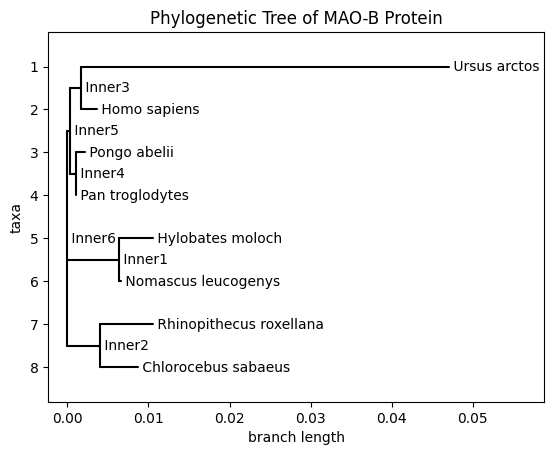

In [16]:
import matplotlib.pyplot as plt
from Bio import Phylo

plt.figure(figsize=(10, 6))
Phylo.draw(tree, do_show=False)
plt.title("Phylogenetic Tree of MAO-B Protein")
plt.savefig("mao_tree.png", dpi=300, bbox_inches="tight")
plt.show()
